In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from systems_and_functions.control_affine_system import ControlAffineSystem
from systems_and_functions.single_track_car_system import SingleTrackCar
from systems_and_functions.inverted_pendulum_system import InvertedPendulum
from systems_and_functions.dlearning_process import DlearningProcess
%matplotlib notebook 
%matplotlib inline  

plt.rcParams.update({'font.size': 20})


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [2]:

system_params = {'psi_ref': 0.5, 'v_ref': 1, 'a_ref': 0.0, 'omega_ref': 0.0, 'mu_scale': 0.1}

car1 = SingleTrackCar(
    system_params = system_params,
    controller_params = None,
    dt = 0.01,
    controller_period = 0.01)

# # Preview of ROLLOUT
# delta_x = torch.tensor([-2, -2,  0.0, 0.0, 0.0, 0.0, 0.0], dtype=torch.float32)
# state_sim, control_output_sim, traj_sim = car1.run_rk4(t_sim = 10,
#                                                        the_controller = None,
#                                                        delta_x = delta_x)

# car1.plot_phase_portrait(traj_sim)
# car1.plot_traj(traj_sim)
# car1.convergence_judgment(traj_sim)


No controller is involved.


-------------------------------Main Iteration------------------------------


S-Curve: 100%|██████████| 499/499 [00:06<00:00, 74.93it/s]
d:\Codes\DOPT\systems_and_functions\dlearning_process.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  K = torch.tensor(-self.system.K)


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 110 steps to unit ball;---------------
----------------It takes 158 steps to converge.--------------
---------------------Initializing Policy------------------------
Epoch [1000/10000], Loss: 0.3892400861
Epoch [2000/10000], Loss: 0.1682584584
Epoch [3000/10000], Loss: 0.1146657318
Epoch [4000/10000], Loss: 0.0867413729
Epoch [5000/10000], Loss: 0.0696457028
Epoch [6000/10000], Loss: 0.0580119789
Epoch [7000/10000], Loss: 0.0494156852
Epoch [8000/10000], Loss: 0.0428392217
Epoch [9000/10000], Loss: 0.0375824571
Epoch [10000/10000], Loss: 0.0332846120


S-Curve: 100%|██████████| 499/499 [00:06<00:00, 73.17it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 110 steps to unit ball;---------------
----------------It takes 160 steps to converge.--------------


d:\Codes\DOPT\systems_and_functions\single_track_car_system.py:854: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
d:\Codes\DOPT\systems_and_functions\single_track_car_system.py:650: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


---------------------------------Iteration 1-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:30<00:00, 66.04it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 9.5320396423
Epoch [2000/4000], Loss: 2.2030968666
Epoch [3000/4000], Loss: 0.9806107283
Epoch [4000/4000], Loss: 0.6666947603
L0:tensor([0.0081], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
 torch.sum(F.relu(dL)):0.0
-----------------------Plotting Lyapunov------------------------


d:\Codes\DOPT\systems_and_functions\dlearning_process.py:442: UserWarning: The following kwargs were not used by contour: 'cmpa'
  contour = ax.contourf(X, Y, Z, levels=25, cmpa='RdBu', alpha = 1)


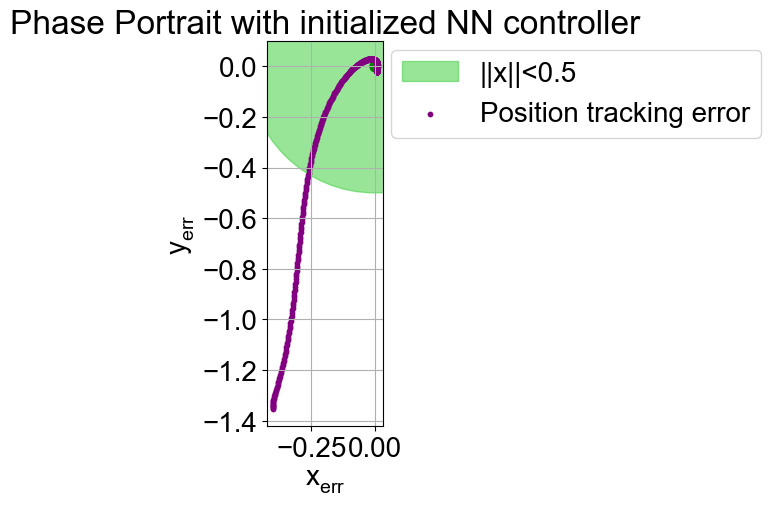

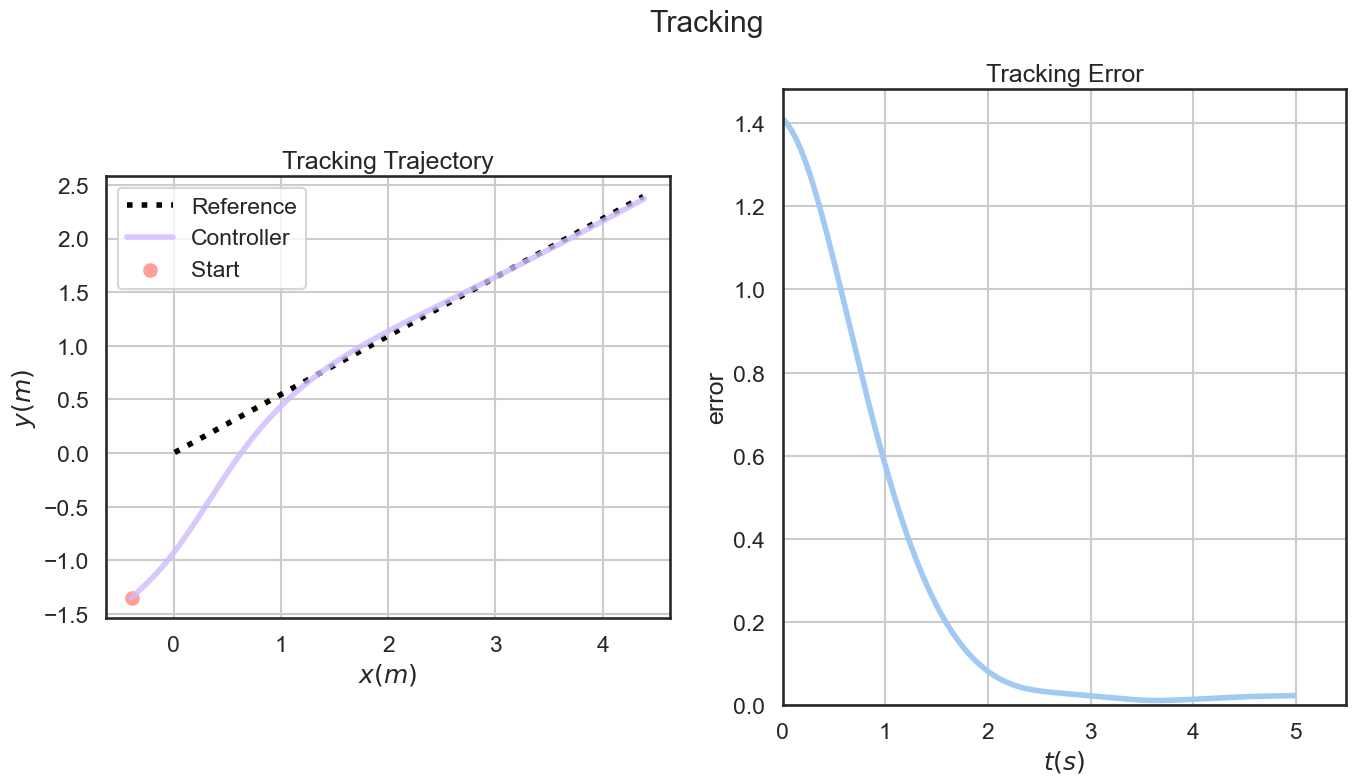

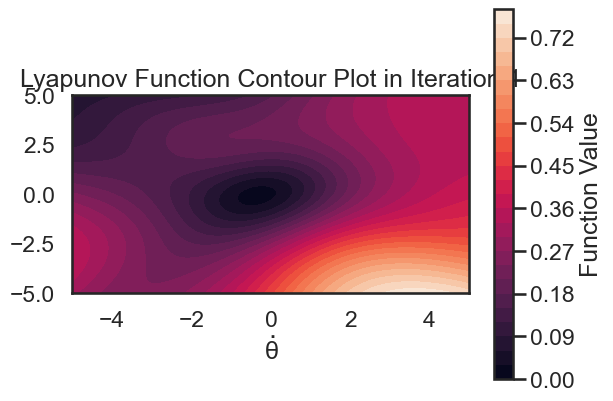

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 0.5767656565
Epoch [2000/5000], Loss: 0.4249827266
Epoch [3000/5000], Loss: 0.3757403791
Epoch [4000/5000], Loss: 0.3550210595
Epoch [5000/5000], Loss: 0.3445201516
torch.sum(loss_fn(dL, DV_ext)):0.18564118444919586, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.0118], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:06<00:00, 77.65it/s]


------------------------Improveing Policy-----------------------


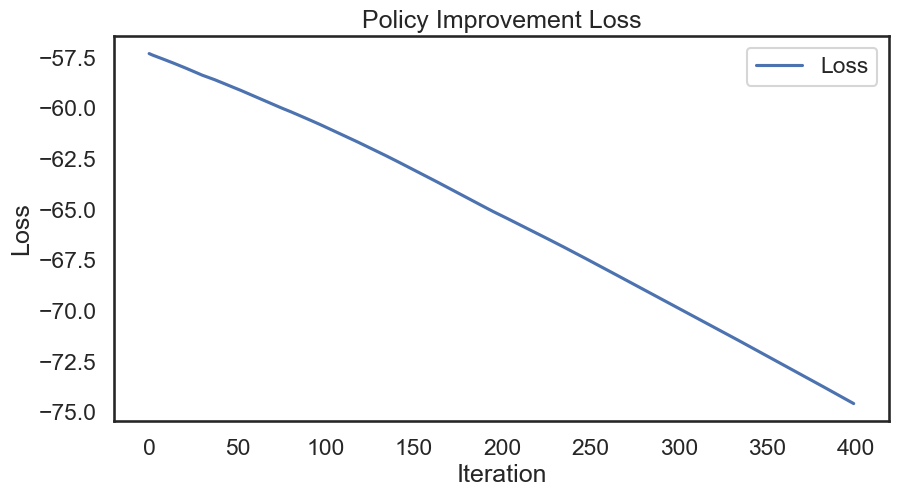

S-Curve: 100%|██████████| 499/499 [00:07<00:00, 70.34it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 100 steps to unit ball;---------------
----------------It takes 151 steps to converge.--------------
----------------------------------Save Data--------------------------------


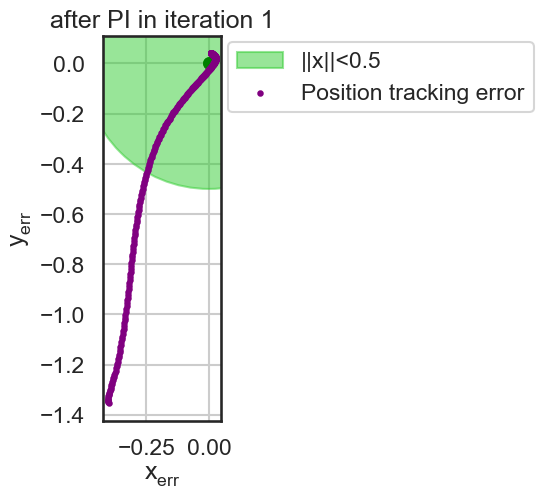

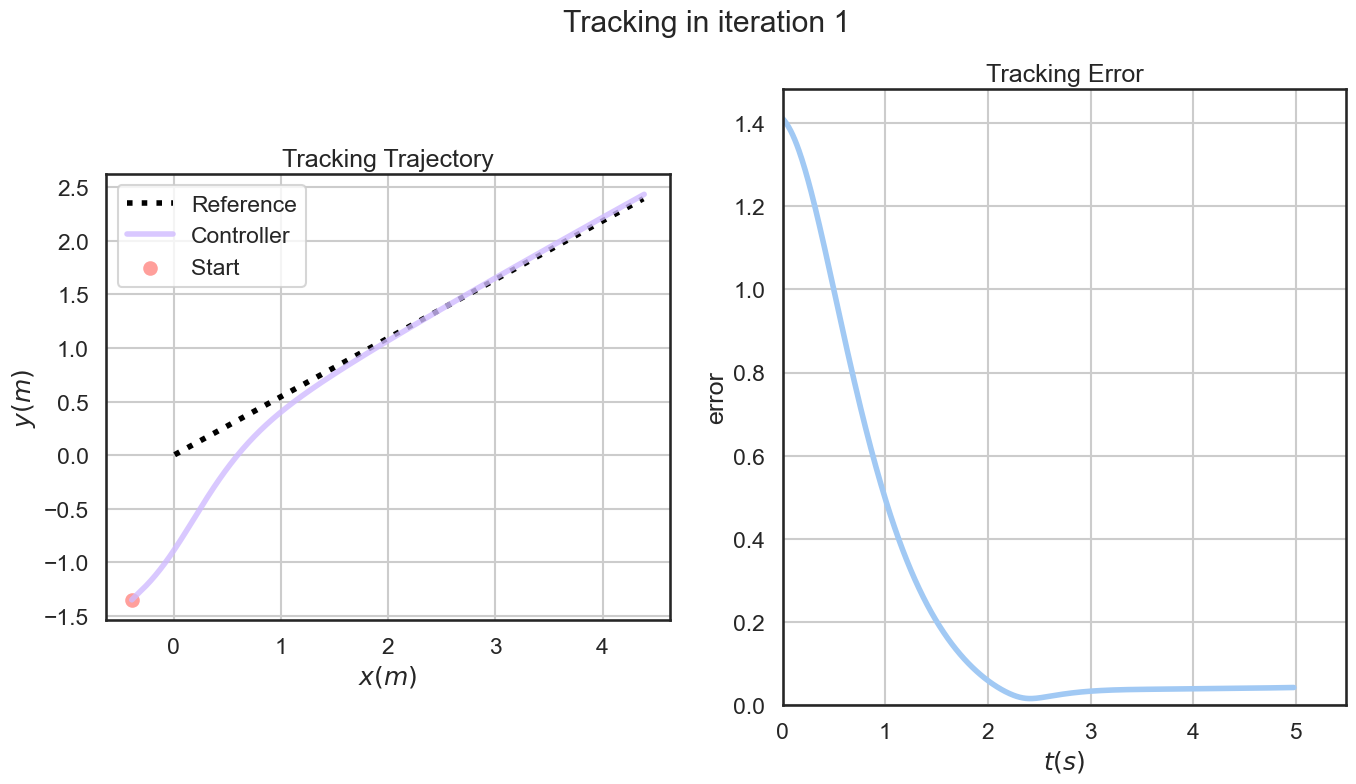

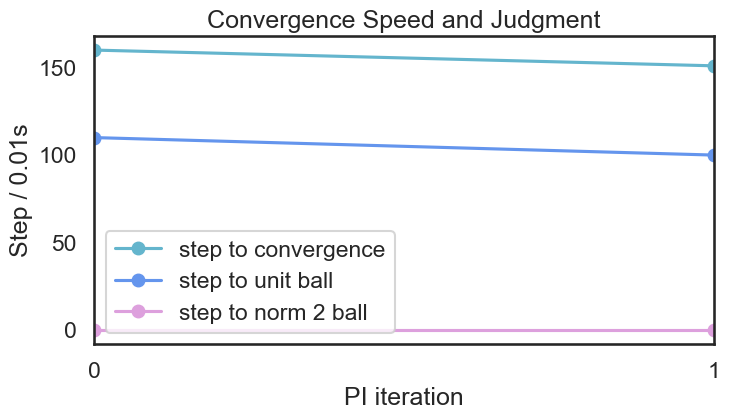

[160, 151]
[110, 100]
[0, 0]
---------------------------------Iteration 2-------------------------------
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 2000/2000 [00:29<00:00, 68.52it/s]


--------------------------Learning V----------------------------
Epoch [1000/4000], Loss: 0.8185342550
Epoch [2000/4000], Loss: 0.5733644366
Epoch [3000/4000], Loss: 0.5573783517
Epoch [4000/4000], Loss: 0.5348278880
L0:tensor([-7.9274e-06], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
 torch.sum(F.relu(dL)):0.0
-----------------------Plotting Lyapunov------------------------


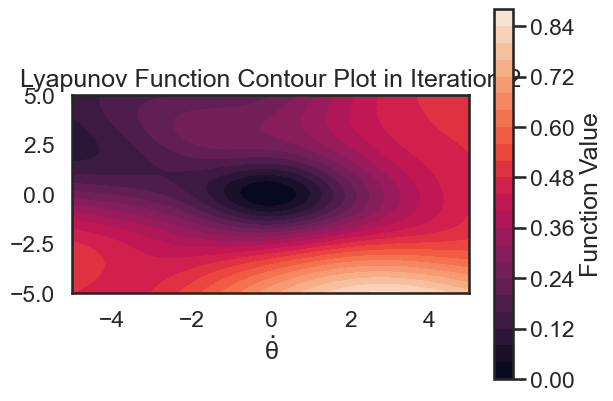

--------------------------Learning D----------------------------
Epoch [1000/5000], Loss: 0.5301285982
Epoch [2000/5000], Loss: 0.5030994415
Epoch [3000/5000], Loss: 0.4815381765
Epoch [4000/5000], Loss: 0.4648954272
Epoch [5000/5000], Loss: 0.4495977163
torch.sum(loss_fn(dL, DV_ext)):0.269035667181015, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.1307], device='cuda:0', grad_fn=<SelectBackward0>)
------------------Sampling Training Data STCar------------------


sample state space: 100%|██████████| 500/500 [00:09<00:00, 50.04it/s]


------------------------Improveing Policy-----------------------


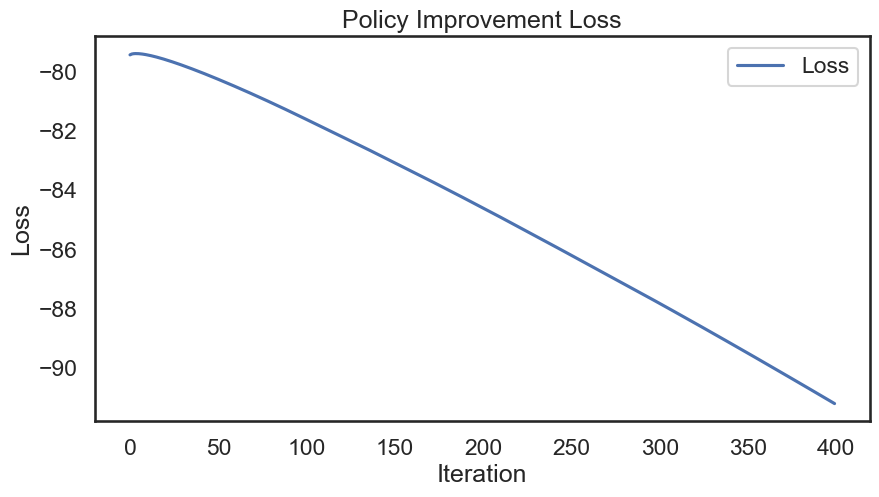

S-Curve: 100%|██████████| 499/499 [00:10<00:00, 49.75it/s]


-----------------Convergence Speed and Judgment-----------------
--------------It takes 0 steps to norm 2 ball;--------------
---------------It takes 94 steps to unit ball;---------------
----------------It takes 153 steps to converge.--------------


In [3]:
d1 = DlearningProcess(system=car1,
                      actor_bound=100.0,
                      n_hiddens_policy=32,
                      n_hiddens_lyapunov=64,
                      n_hiddens_dfunction=64,
                      save_path = 'experiment_results/Dlearning/')


delta_x = torch.tensor([[-1, -1]], dtype=torch.float32)

d1.dlearning_main_iteration_4_stcar(iteration= 20,
                                    delta_x = delta_x,
                                    plot_time_span = 5.0,)

In [ ]:
# eval controller
car1.modifiy_param({'psi_ref': 0.5, 'v_ref': 1, 'a_ref': 0.0, 'omega_ref': 1, 'mu_scale': 0.03}) # 0.03
delta_x = torch.tensor([0, 0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=torch.float32)
t = 6
state_sim, control_output_sim, traj_sim = car1.run_rk4(t_sim = t,
                                                       the_controller = None,
                                                       delta_x = delta_x)

# car1.plot_phase_portrait(traj_sim=traj_sim,
#                          title = 'System Phase Portrait before PI',
#                          save_fig=0)
car1.plot_traj(traj_sim=traj_sim,
               title='',
               save_fig=0)